# LESSON 20

### Sigmoid函数

In [12]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from functools import reduce
from collections import defaultdict
import networkx as nx
import numpy as np
import random

In [13]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [14]:
sub_x = np.linspace(-10, 10)

In [15]:
def random_linear(x):
    k, b = random.normalvariate(0,1), random.normalvariate(0,1)
    return k * x + b

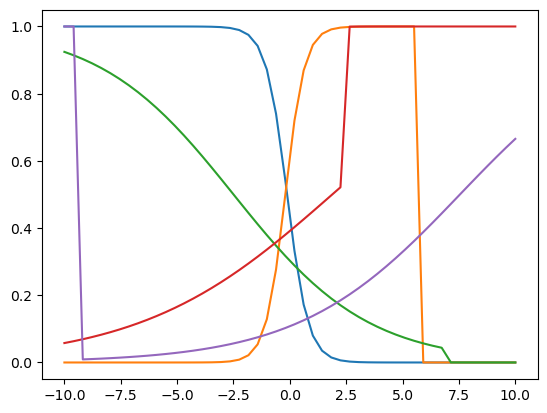

In [16]:
for _ in range(5):
    i = random.choice(range(len(sub_x)))
    linear_output = np.concatenate((random_linear(sub_x[:i]), random_linear(sub_x[i:])))
    i_2 = random.choice(range(len(linear_output)))
    output = np.concatenate((sigmoid(linear_output[:i_2]), sigmoid(linear_output[i_2:])))
    plt.plot(sub_x, output)

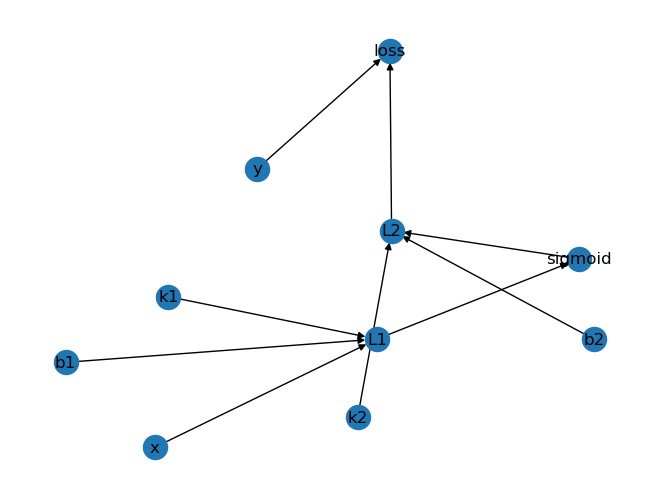

In [17]:
computing_graph = {
    'k1': ['L1'],
    'b1': ['L1'],
    'x': ['L1'],
    'L1':['sigmoid'],
    'sigmoid': ['L2'],
    'k2': ['L2'],
    'b2': ['L2'],
    'L2': ['loss'],
    'y': ['loss']
}

nx.draw(nx.DiGraph(computing_graph), with_labels = True)

In [18]:
def get_output(graph, node):
    outputs = []
    for n, links in graph.items():
        if node == n: outputs += links
    return outputs


In [19]:
get_output(computing_graph, 'k1')

['L1']

In [20]:
def get_paramter_partial_order(p):
    computing_order = []

    target = p
    out = get_output(computing_graph, target)[0]
    computing_order.append(target)

    while out:
        computing_order.append(out)
        out = get_output(computing_graph, out)
        if out: out = out[0]

    order = []

    for i, n in enumerate(computing_order[:-1]):
        order.append((computing_order[i + 1], n))
        # order += ' * ∂{} / ∂{}'.format(n, computing_order[i+1])

    return ' * '.join(['∂{}/∂{}'.format(a, b) for a, b in order[::-1]])

In [21]:
for p in ['b1', 'k1', 'b2', 'k2']:
    print(get_paramter_partial_order(p))

∂loss/∂L2 * ∂L2/∂sigmoid * ∂sigmoid/∂L1 * ∂L1/∂b1
∂loss/∂L2 * ∂L2/∂sigmoid * ∂sigmoid/∂L1 * ∂L1/∂k1
∂loss/∂L2 * ∂L2/∂b2
∂loss/∂L2 * ∂L2/∂k2


# 拓朴排序计算

In [ ]:
def topologic(graph):
    sorted_node = []

    while len(graph) > 0:
        all_inputs = []
        all_outputs = []

        for n in graph:
            all_inputs += graph[n]
            all_outputs.append(n)

        all_inputs = set(all_inputs)
        all_outputs = set(all_outputs)

        need_remove = all_outputs - all_inputs # which in all_inputs but not in all_outputs

        if len(need_remove) > 0:
            node = random.choice(list(need_remove))
            
            visited_next = [node]
            if len(graph) == 1: visited_next += graph[node]
            
            graph.pop(node)
            sorted_node += visited_next

            for _, links in graph.items():
                if node in links: links.remove(node)
        else:
            raise TypeError('This graph has circle, which cannot get topological order.')
    
    return sorted_node

In [330]:
x, k, b, linear, sigmoid, y, loss = 'x', 'k', 'b', 'linear', 'sigmoid', 'y', 'loss'
test_graph = {
    x: [linear],
    k: [linear],
    b: [linear],
    linear: [sigmoid],
    sigmoid: [loss],
    y: [loss]
}

In [331]:
topologic(test_graph)

['k', 'x', 'y', 'b', 'linear', 'sigmoid', 'loss']

![欢迎订阅：坍缩的奇点](../assets/Capture-2023-11-02-164446.png)